In [1]:
import pandas as pd
import numpy as np
import scipy 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from random import choices,sample

import os
import gc
import pickle

import warnings
warnings.filterwarnings('ignore')

from datetime import timedelta
from tqdm import tqdm

plt.style.use('ggplot')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

os.chdir("../../")
root_path = os.getcwd()

raw_file_path = os.path.join(root_path, "Bigcon2020_raw_file")
csv_file_path = os.path.join(root_path, "BigCon_2020/csv_files")
pickle_file_path = os.path.join(root_path, "BigCon_2020/pickle_files")

raw_file_folders = os.listdir(raw_file_path)

folder_path = os.path.join(raw_file_path, raw_file_folders[0])

In [ ]:
def register_add_time_property(register):
    register['STD_DD']=pd.to_datetime(register.STD_DD, format='%Y%m%d')
    
    register['year'] = register['STD_DD'].dt.year.values
    register['month'] = register['STD_DD'].dt.month.values
    register['weekofyear'] = register['STD_DD'].dt.weekofyear.values
    register['dayofweek'] = register['STD_DD'].dt.dayofweek.values

    register['weekday'] = np.where(register.dayofweek<5,'평일','주말')
    
    return register

In [188]:
cat_dict = {10 : '숙박',
20 : '레저용품',
21 : '레저업소',
22 : '문화취미',
30 : '가구',
31 : '전기',
32 : '주방용구',
33 : '연료판매',
34 : '광학제품',
35 : '가전',
40 : '유통업',
42 : '의복',
43 : '직물',
44 : '신변잡화',
50 : '서적문구',
52 : '사무통신',
60 : '자동차판매',
62 : '자동차 정비',
70 : '의료기관',
71 : '보건위생',
80 : '요식업소',
81 : '음료식품',
92 : '수리서비스'}

In [2]:
sk_files = [file for file in os.listdir(csv_file_path) if file.startswith('SK_melted')]
card_files = [file for file in os.listdir(csv_file_path) if file.startswith('카드')]

In [3]:
df_list_card = []

for file_name in card_files:
    file_path = os.path.join(csv_file_path, file_name)
    df = pd.read_csv(file_path)
    df_list_card.append(df)

In [4]:
df_list_sk = []

for file_name in sk_files:
    file_path = os.path.join(csv_file_path, file_name)
    df = pd.read_csv(file_path)
    df_list_sk.append(df)

In [10]:
register = df_list_card[1].drop(df_list_card[1].columns[0], axis=1)

In [13]:
fp_age= df_list_sk[0]
fp_time = df_list_sk[1]

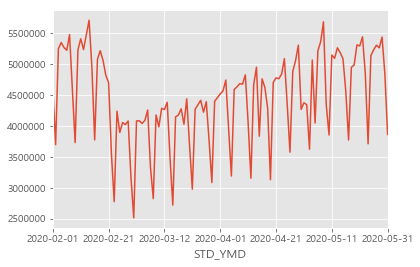

In [22]:
fp_time.query('year==2020').groupby('STD_YMD')['flow_counts'].sum().plot()

In [28]:
np.argmax(fp_time.query('year==2019 & month==2').groupby(['STD_YMD'])['flow_counts'].sum())

'2019-02-22'

In [ ]:
except_day = ['2019-02-03','2019-02-04','2019-02-05','2019-02-06']

In [62]:
fp_time.query('year==2019 & month==2')

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,time,flow_counts,year,month,weekofyear,dayofweek,weekday
0,201902,2019-02-01,1114052000,소공동,TMST_00,1496.35,2019,2,5,4,평일
1,201902,2019-02-01,1114052000,소공동,TMST_01,1022.83,2019,2,5,4,평일
2,201902,2019-02-01,1114052000,소공동,TMST_02,706.51,2019,2,5,4,평일
3,201902,2019-02-01,1114052000,소공동,TMST_03,547.77,2019,2,5,4,평일
4,201902,2019-02-01,1114052000,소공동,TMST_04,1673.02,2019,2,5,4,평일
...,...,...,...,...,...,...,...,...,...,...,...
393979,201902,2019-02-28,2726069000,고산3동,TMST_19,2327.66,2019,2,9,3,평일
393980,201902,2019-02-28,2726069000,고산3동,TMST_20,3190.73,2019,2,9,3,평일
393981,201902,2019-02-28,2726069000,고산3동,TMST_21,2728.98,2019,2,9,3,평일
393982,201902,2019-02-28,2726069000,고산3동,TMST_22,2193.95,2019,2,9,3,평일


In [68]:
def get_minNmax_fp_date(df):
    
    #설연휴 유동인구의 경우 특별한 케이스이므로 제외    
    df_feb_2019 = df.query('year==2019 & month==2 & STD_YMD not in[\'2019-02-01\',\'2019-02-02\',\'2019-02-03\',\'2019-02-04\',\'2019-02-05\',\'2019-02-06\']')
    df_mar_2019 = df.query('year==2019 & month==3')
    
    df_feb_2020 = df.query('year==2020 & month==2')
    df_mar_2020 = df.query('year==2020 & month==3')
    
    mx2019 = np.argmax(df_feb_2019.groupby(['STD_YMD'])['flow_counts'].sum())
    mn2019 = np.argmin(df_mar_2019.groupby(['STD_YMD'])['flow_counts'].sum())
    
    mx2020 = np.argmax(df_feb_2020.groupby(['STD_YMD'])['flow_counts'].sum())
    mn2020 = np.argmin(df_mar_2020.groupby(['STD_YMD'])['flow_counts'].sum())
    
    return mn2019,mx2019,mn2020,mx2020

In [155]:
def risk_index_fp(df):
    hdong = list(df.HDONG_NM.unique())
    risk_by_dong = {}
    
    for dong in hdong:
        tmp_df = df.loc[df.HDONG_NM==dong]
        min2019,max2019,min2020,max2020 = get_minNmax_fp_date(tmp_df)
        
        tmp_df = tmp_df.groupby('STD_YMD')['flow_counts'].sum().reset_index()
        
        # min_date_index_2019 = tmp_df[tmp_df.STD_YMD == min2019].index.values[0]
        # max_date_index_2019 = tmp_df[tmp_df.STD_YMD == max2019].index.values[0]
        
        min_date_index_2020 = tmp_df[tmp_df.STD_YMD == min2020].index.values[0]
        max_date_index_2020 = tmp_df[tmp_df.STD_YMD == max2020].index.values[0]
        
        # fp_feb_2019 = tmp_df.iloc[min_date_index_2019:min_date_index_2019+7,1].sum()
        # fp_mar_2019 = tmp_df.iloc[max_date_index_2019:max_date_index_2019+7,1].sum()
        
        fp_feb_2019 = tmp_df.iloc[:28,1].mean()
        fp_mar_2019 = tmp_df.iloc[28:28+31,1].mean()
        
        fp_feb_2020 = tmp_df.iloc[min_date_index_2020:min_date_index_2020+7,1].sum()
        fp_mar_2020 = tmp_df.iloc[max_date_index_2020:max_date_index_2020+7,1].sum()
        
        r1 = (fp_mar_2019 - fp_feb_2019)/fp_feb_2019
        r2 = (fp_mar_2020 - fp_feb_2020)/fp_feb_2020
        
        risk = np.sqrt((r1+1)*(r2+1))-1
        
        risk_by_dong[dong] = risk
        
    return risk_by_dong

In [156]:
risk_fp = risk_index_fp(fp_time)

In [157]:
risk_fp

{'고산1동': 0.16434175780614302,
 '고산2동': 0.14683700127673216,
 '고산3동': 0.12188458055948792,
 '공릉1동': 0.11580190981322058,
 '공릉2동': 0.161186476099745,
 '광희동': 0.22643143625665796,
 '남산1동': 0.2480224307585377,
 '남산2동': 0.35023624640543605,
 '남산3동': 0.17448727350555737,
 '남산4동': 0.10010788911926283,
 '다산동': 0.21509276750020767,
 '대봉1동': 0.14303057324373913,
 '대봉2동': 0.22114842277266433,
 '대신동': 0.30583784905608136,
 '동인동': 0.24795224564474205,
 '동화동': 0.42128369224935125,
 '두산동': 0.1394192784922983,
 '만촌1동': 0.18314637381369514,
 '만촌2동': 0.2814392636565004,
 '만촌3동': 0.1493902699675418,
 '명동': 0.2463117226525937,
 '범물1동': 0.13586474396814907,
 '범물2동': 0.09829860687624659,
 '범어1동': 0.18770667476399594,
 '범어2동': 0.28240535550614254,
 '범어3동': 0.2415832516281764,
 '범어4동': 0.4390105149218524,
 '삼덕동': 0.312531212022078,
 '상계10동': 0.10026788710594903,
 '상계1동': 0.12097645754258601,
 '상계2동': 0.18588715398880407,
 '상계3.4동': 0.03713464318237758,
 '상계5동': 0.07114612993583713,
 '상계6.7동': 0.10612803842133

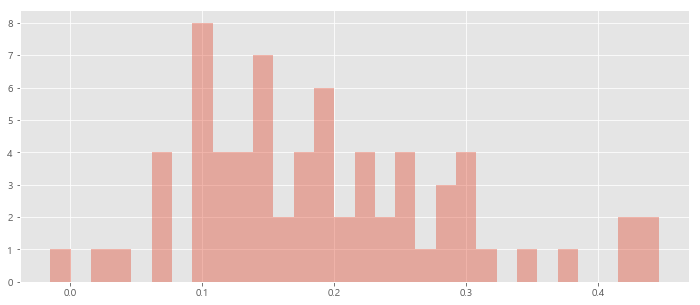

In [158]:
plt.figure(figsize=(12,5))
sns.distplot([v for i,v in risk_fp.items()], kde=False, bins=30)

<Figure size 864x360 with 0 Axes>

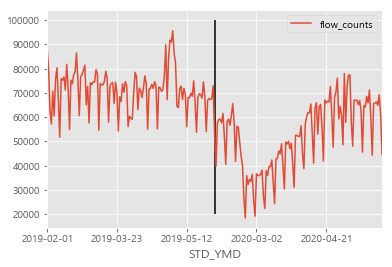

In [120]:
plt.figure(figsize=(12,5))
fp_time.loc[fp_time.HDONG_NM=='동인동'].groupby(['STD_YMD'])['flow_counts'].sum().reset_index().set_index('STD_YMD').plot()

plt.vlines(x=120,ymin=20000, ymax=100000)

<Figure size 864x360 with 0 Axes>

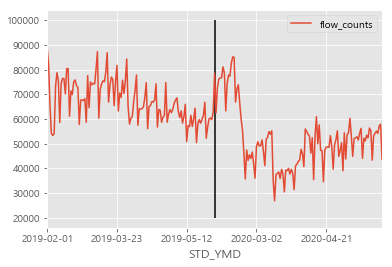

In [117]:
plt.figure(figsize=(12,5))
fp_time.loc[fp_time.HDONG_NM=='황금2동'].groupby(['STD_YMD'])['flow_counts'].sum().reset_index().set_index('STD_YMD').plot()

plt.vlines(x=120,ymin=20000, ymax=100000)

<Figure size 864x360 with 0 Axes>

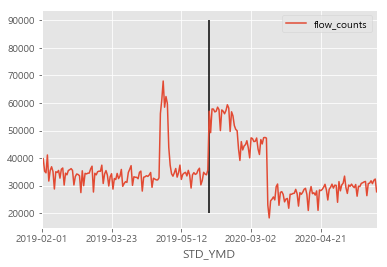

In [119]:
fp_time.loc[fp_time.HDONG_NM=='지산2동'].groupby(['STD_YMD'])['flow_counts'].sum().reset_index().set_index('STD_YMD').plot()

plt.vlines(x=120,ymin=20000, ymax=90000)

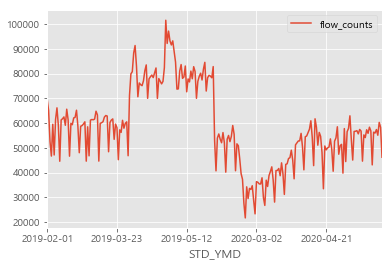

In [94]:
fp_time.loc[fp_time.HDONG_NM=='수성4가동'].groupby(['STD_YMD'])['flow_counts'].sum().reset_index().set_index('STD_YMD').plot()

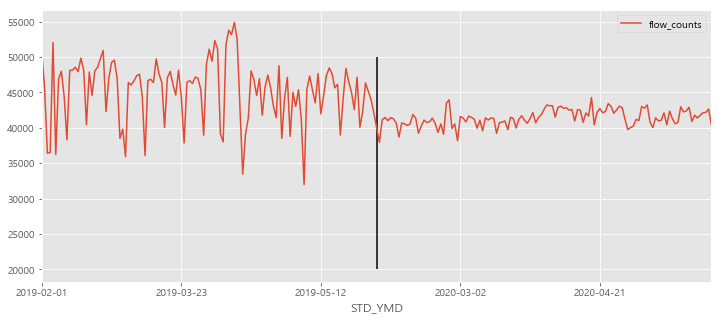

In [161]:
fp_time.loc[fp_time.HDONG_NM=='월계2동'].groupby(['STD_YMD'])['flow_counts'].sum().reset_index().set_index('STD_YMD').plot(figsize=(12,5))

plt.vlines(x=120,ymin=20000, ymax=50000)

In [133]:
register

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,20190201,110,517,10,F,25,11,595
1,20190201,110,517,10,F,50,5,243
2,20190201,110,517,10,F,55,5,27
3,20190201,110,517,10,M,20,11,243
4,20190201,110,517,10,M,25,11,433
...,...,...,...,...,...,...,...,...
2537748,20200531,350,720,81,M,45,19,127
2537749,20200531,350,720,81,M,50,33,211
2537750,20200531,350,720,81,M,55,9,61
2537751,20200531,350,720,81,M,60,19,194


In [134]:
os.listdir(pickle_file_path)

['convert_name_to_code.pickle',
 '카드_구_행정동_코드_명_변환.pickle',
 '카드_카테고리_코드_명_변환.pickle']

In [136]:
with open(os.path.join(pickle_file_path,'카드_구_행정동_코드_명_변환.pickle'), 'rb') as f:
    convert_dict = pickle.load(f)

In [143]:
register['GU_NM'] = register.GU_CD.map(convert_dict.get('구'))
register['HDONG_NM'] = register.DONG_CD.map(convert_dict.get('행정동'))

In [150]:
register['STD_DD']=pd.to_datetime(register.STD_DD, format='%Y%m%d')

In [151]:
register['year'] = register['STD_DD'].dt.year.values
register['month'] = register['STD_DD'].dt.month.values
register['weekofyear'] = register['STD_DD'].dt.weekofyear.values
register['dayofweek'] = register['STD_DD'].dt.dayofweek.values

register['weekday'] = np.where(register.dayofweek<5,'평일','주말')

In [152]:
register.groupby(['HDONG_NM','STD_DD'])['USE_AMT'].sum()

HDONG_NM  STD_DD    
공릉2동      2019-02-01    458347
          2019-02-02    485488
          2019-02-03    347320
          2019-02-04    331056
          2019-02-05    191785
                         ...  
황금2동      2020-05-27    849898
          2020-05-28    274265
          2020-05-29    333527
          2020-05-30    318103
          2020-05-31    214756
Name: USE_AMT, Length: 11327, dtype: int64

In [154]:
def get_minNmax_cardAMT_date(df):
    
    # 설연휴 유동인구의 경우 특별한 케이스이므로 제외    
    # df_feb_2019 = df.query('year==2019 & month==2 & STD_DD not in[\'2019-02-01\',\'2019-02-02\',\'2019-02-03\',\'2019-02-04\',\'2019-02-05\',\'2019-02-06\']')
    # df_mar_2019 = df.query('year==2019 & month==3')
    
    df_feb_2020 = df.query('year==2020 & month==2')
    df_mar_2020 = df.query('year==2020 & month==3')
    
    # mx2019 = np.argmax(df_feb_2019.groupby(['STD_YMD'])['flow_counts'].sum())
    # mn2019 = np.argmin(df_mar_2019.groupby(['STD_YMD'])['flow_counts'].sum())
    
    mx2020 = np.argmax(df_feb_2020.groupby(['STD_DD'])['USE_AMT'].sum())
    mn2020 = np.argmin(df_mar_2020.groupby(['STD_DD'])['USE_AMT'].sum())
    
    return mn2020,mx2020

In [167]:
# outlier제거하는 방향으로 해봐야할듯

def risk_index_cardAMT(df):
    hdong = list(df.HDONG_NM.unique())
    risk_by_dong = {}
    
    for dong in tqdm(hdong):
        tmp_df = df.loc[df.HDONG_NM==dong]
        min2020,max2020 = get_minNmax_cardAMT_date(tmp_df)
        
        tmp_df = tmp_df.groupby('STD_DD')['USE_AMT'].sum().reset_index()
        
        min_date_index_2020 = tmp_df[tmp_df.STD_DD == min2020].index.values[0]
        max_date_index_2020 = tmp_df[tmp_df.STD_DD == max2020].index.values[0]
        
        # 2월과 3월의 날짜가 차이가 나기때문에 평균소비액으로 계산
        fp_feb_2019 = tmp_df.iloc[:28,1].mean() # 19.02.01 ~ 19.02.28까지 매출의 평균
        fp_mar_2019 = tmp_df.iloc[28:28+31,1].mean() # 19.03.01 ~ 19.03.31까지 매출의 평균
        
        fp_feb_2020 = tmp_df.iloc[min_date_index_2020:min_date_index_2020+7,1].sum()
        fp_mar_2020 = tmp_df.iloc[max_date_index_2020:max_date_index_2020+7,1].sum()
        
        r1 = (fp_mar_2019 - fp_feb_2019)/fp_feb_2019
        r2 = (fp_mar_2020 - fp_feb_2020)/fp_feb_2020
        
        risk = np.sqrt((r1+1)*(r2+1))-1
        
        risk_by_dong[dong] = risk
        
    return risk_by_dong

In [168]:
risk_index_cardAMT(register)

100%|███████████████████████████████████████████████████████████████████| 47/47 [00:06<00:00,  6.98it/s]


{'공릉2동': 0.17731172843000764,
 '남산1동': 0.18213852296848176,
 '남산2동': 0.2464068672146411,
 '남산3동': 0.4930542845100061,
 '남산4동': 0.04789278432182642,
 '대봉1동': 0.18902620676715354,
 '대봉2동': 0.08479437322379613,
 '대신동': 0.13796187344190813,
 '동인동': 0.4000546294239058,
 '만촌1동': 0.1437540136642388,
 '만촌2동': 0.16895088185300944,
 '만촌3동': 0.23564982620557484,
 '범물1동': 0.2735090591229772,
 '범물2동': 0.03462089354268927,
 '범어1동': 0.3514001022478117,
 '범어2동': 0.15989391343169612,
 '범어3동': 0.32179910132323886,
 '범어4동': 0.15771668268540973,
 '삼덕동': 0.424650911179858,
 '상계10동': 0.13184569542727487,
 '상계3.4동': 0.08128157795960722,
 '상계6.7동': 0.15063864970076524,
 '상계8동': 0.04685174806105441,
 '상계9동': 0.008742860156363275,
 '상동': 0.266962879814008,
 '성내1동': 0.44693044272916715,
 '성내2동': 0.5204904205463348,
 '성내3동': 0.731788912914288,
 '수성1가동': 0.263628118402929,
 '수성2.3가동': 0.23560021337507897,
 '수성4가동': 0.2089735663086505,
 '신당동': 0.13024701596103183,
 '약수동': 0.06073727198243084,
 '을지로동': 0.18014292533

In [176]:
register['STD_DD'] = register.STD_DD.astype(str)

In [257]:
np.max(register.loc[register.HDONG_NM=='파동'].query('year==2020 & month==2').groupby('STD_DD')['USE_AMT'].sum())

697132

In [267]:
def plot_cardAMT_risk(df, dong):
    tmp_df = df.loc[df.HDONG_NM==dong].reset_index(drop=True)
    mean_feb_2019 = tmp_df.query('year==2019 & month==2').groupby('STD_DD')['USE_AMT'].sum().mean()
    mean_mar_2019 = tmp_df.query('year==2019 & month==3').groupby('STD_DD')['USE_AMT'].sum().mean()
    max_feb_2020 = np.max(tmp_df.query('year==2020 & month==2').groupby('STD_DD')['USE_AMT'].sum())

    fig, ax = plt.subplots(figsize=(16,9))
    ax = sns.lineplot(
        data = tmp_df.groupby('STD_DD')['USE_AMT'].sum().reset_index(),
        x = 'STD_DD',
        y = 'USE_AMT'
    )
    
    low, high = ax.get_ybound()
    ax.axvspan(xmin=120.5, xmax=180, ymin=low,ymax=max_feb_2020*1.1, color='skyblue', alpha=0.15,)
    print(max_feb_2020)
    ax.hlines(y=mean_feb_2019, xmin=-0.5, xmax=28.5)
    ax.hlines(y=mean_mar_2019, xmin=28.5, xmax=59.5)
    
    if mean_mar_2019 - mean_feb_2019 > 0:
        ax.annotate(f'{np.abs((mean_mar_2019 - mean_feb_2019)/mean_feb_2019):.2%} 증가', (24,low*1.2))
    else:
        ax.annotate(f'{np.abs((mean_mar_2019 - mean_feb_2019)/mean_feb_2019):.2%} 감소', (24,low*1.2))
        
    ax.annotate(s='', xy=(28.5,mean_feb_2019), xytext=(28.5,mean_mar_2019), arrowprops=dict(arrowstyle='<->', color='blue'))

143623


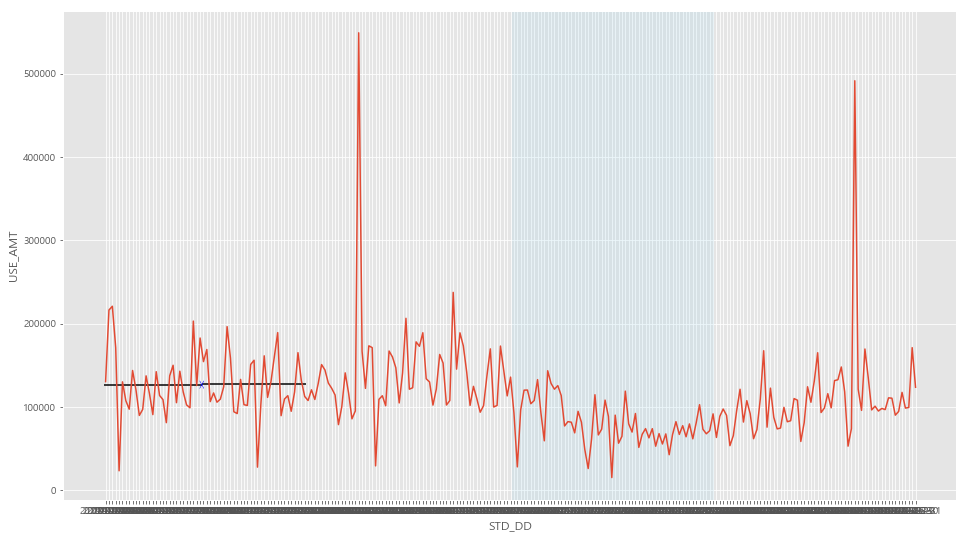

In [268]:
plot_cardAMT_risk(register, '범물1동')

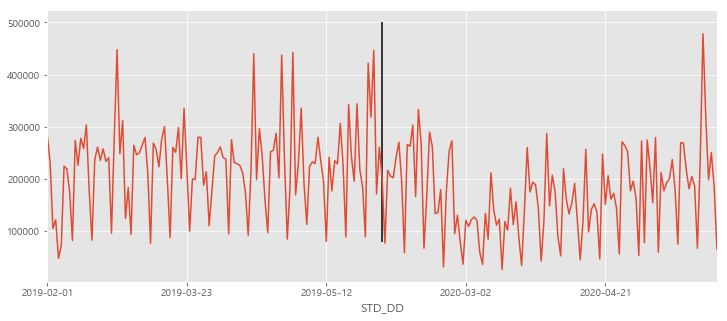

In [206]:
register.loc[register.HDONG_NM=='동인동'].groupby(['STD_DD'])['USE_AMT'].sum().plot(figsize=(12,5))

plt.vlines(x=120, ymin=80000, ymax=500000)

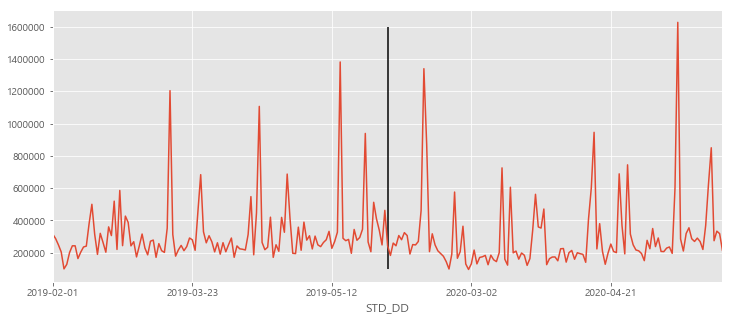

In [180]:
register.loc[register.HDONG_NM=='황금2동'].groupby(['STD_DD'])['USE_AMT'].sum().plot(figsize=(12,5))

plt.vlines(x=120, ymin=100000, ymax=1600000)

In [189]:
register['MCT_CAT_NM'] = register.MCT_CAT_CD.map(cat_dict)

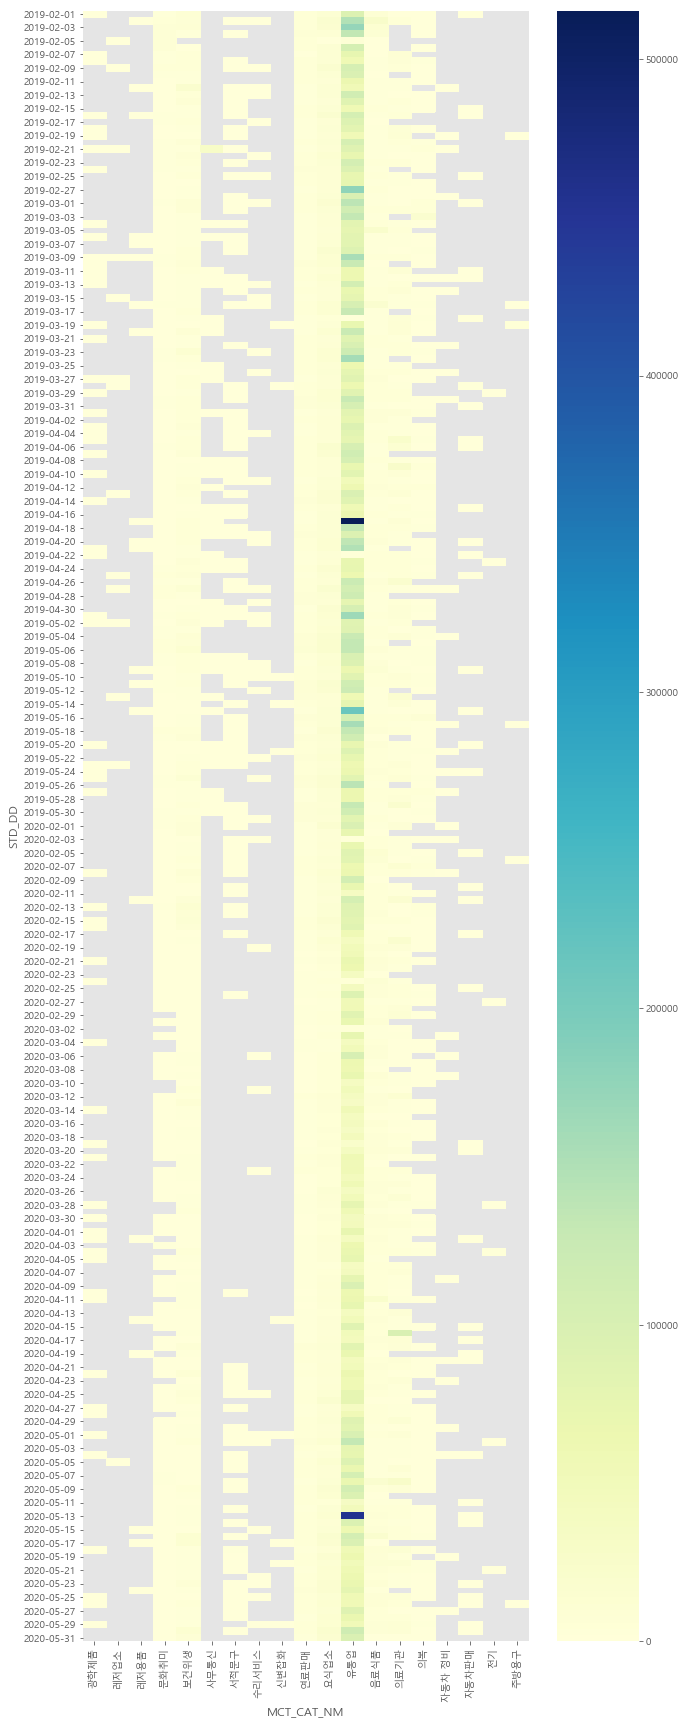

In [249]:
plt.figure(figsize=(10,30))
sns.heatmap(
    register.loc[register.HDONG_NM=='범물1동'].groupby(['STD_DD','MCT_CAT_NM'])['USE_AMT'].sum().reset_index().pivot('STD_DD','MCT_CAT_NM','USE_AMT'),
    cmap='YlGnBu'
)

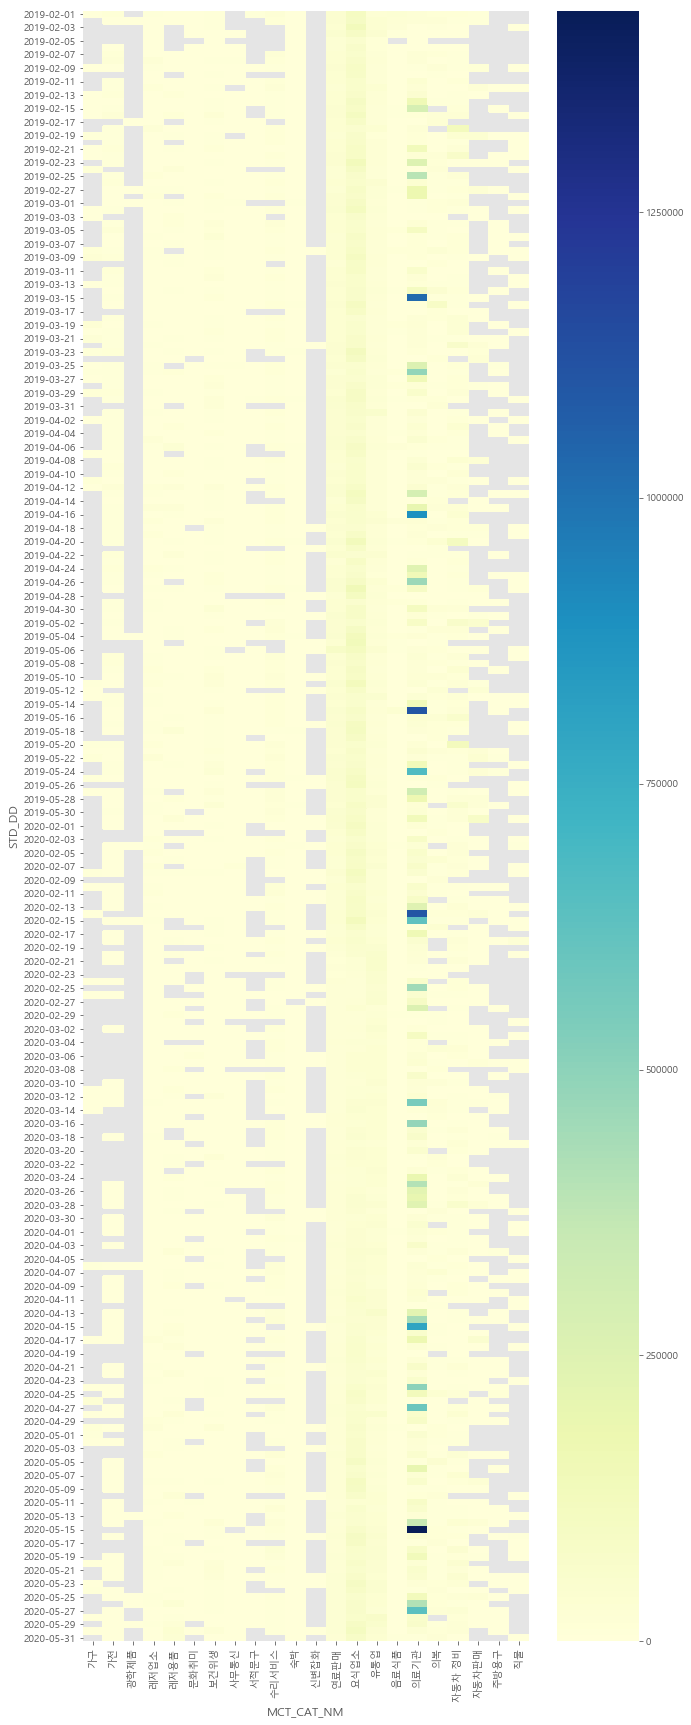

In [190]:
plt.figure(figsize=(10,30))
sns.heatmap(
    register.loc[register.HDONG_NM=='황금2동'].groupby(['STD_DD','MCT_CAT_NM'])['USE_AMT'].sum().reset_index().pivot('STD_DD','MCT_CAT_NM','USE_AMT'),
    cmap='YlGnBu'
)

In [255]:
register.loc[(register.HDONG_NM=='범물1동')&(register.STD_DD=='2020-05-13')].groupby(['STD_DD','MCT_CAT_NM','AGE_CD','SEX_CD']).sum().tail(55)

GU_CD  DONG_CD  MCT_CAT_CD  USE_CNT  \
STD_DD     MCT_CAT_NM AGE_CD SEX_CD                                        
2020-05-13 요식업소       65     M         260      661          80       22   
           유통업        20     F         260      661          40       77   
                             M         260      661          40       11   
                      25     F         260      661          40      224   
                             M         260      661          40      301   
                      30     F         260      661          40      202   
                             M         260      661          40      202   
                      35     F         260      661          40      520   
                             M         260      661          40      213   
                      40     F         260      661          40      613   
                             M         260      661          40      596   
                      45     F         260      661          40      793   
                             M         260      661          40      563   
                      50     F         260      661          40      913   
                             M         260      661          40      350   
                      55     F         260      661          40      531   
                             M         260      661          40      323   
                      60     F         260      661          40      667   
                             M         260      661          40      224   
                      65     F         260      661          40      733   
                             M         260      661          40      481   
           음료식품       20     F         260      661          81       22   
                      25     M         260      661          81        5   
                      30     F         260      661          81        5   
                             M         260      661          81        5   
                      35     F         260      661          81       22   
                             M         260      661          81       27   
                      40     F         260      661          81       27   
                             M         260      661          81       38   
                      45     F         260      661          81       16   
                             M         260      661          81       49   
                      50     F         260      661          81       22   
                             M         260      661          81       16   
                      55     F         260      661          81       38   
                             M         260      661          81       22   
                      60     F         260      661          81       33   
                             M         260      661          81       16   
                      65     F         260      661          81       44   
                             M         260      661          81        5   
           의료기관       25     F         260      661          70       11   
                      30     F         260      661          70        5   
                             M         260      661          70       11   
                      40     F         260      661          70       11   
                      45     F         260      661          70       11   
                             M         260      661          70       22   
                      50     F         260      661          70       16   
                             M         260      661          70       11   
                      55     M         260      661          70        5   
                      60     F         260      661          70       11   
                             M         260      661          70        5   
                      65     F         260      661          70        5   
         

In [269]:
register.loc[(register.HDONG_NM=='범물1동')&(register.STD_DD=='2019-04-17')].groupby(['STD_DD','MCT_CAT_NM','AGE_CD','SEX_CD']).sum().tail(55)

GU_CD  DONG_CD  MCT_CAT_CD  USE_CNT  \
STD_DD     MCT_CAT_NM AGE_CD SEX_CD                                        
2019-04-17 유통업        20     M         260      661          40       39   
                      25     F         260      661          40      259   
                             M         260      661          40      309   
                      30     F         260      661          40      342   
                             M         260      661          40      248   
                      35     F         260      661          40      734   
                             M         260      661          40      370   
                      40     F         260      661          40      811   
                             M         260      661          40      822   
                      45     F         260      661          40      999   
                             M         260      661          40      535   
                      50     F         260      661          40      972   
                             M         260      661          40      403   
                      55     F         260      661          40      905   
                             M         260      661          40      414   
                      60     F         260      661          40      778   
                             M         260      661          40      293   
                      65     F         260      661          40      822   
                             M         260      661          40      342   
           음료식품       20     F         260      661          81        6   
                      25     F         260      661          81       17   
                      30     F         260      661          81       17   
                      35     F         260      661          81       39   
                             M         260      661          81       22   
                      40     F         260      661          81       22   
                             M         260      661          81       17   
                      45     F         260      661          81       44   
                             M         260      661          81       11   
                      50     F         260      661          81       22   
                             M         260      661          81       11   
                      55     F         260      661          81       33   
                             M         260      661          81       22   
                      60     F         260      661          81       33   
                             M         260      661          81        6   
                      65     F         260      661          81       28   
                             M         260      661          81       28   
           의료기관       20     F         260      661          70       11   
                      25     F         260      661          70       11   
                             M         260      661          70        6   
                      30     M         260      661          70        6   
                      35     F         260      661          70       11   
                             M         260      661          70       28   
                      40     F         260      661          70       11   
                             M         260      661          70        6   
                      45     F         260      661          70       28   
                      50     F         260      661          70       11   
                             M         260      661          70       22   
                      55     F         260      661          70       22   
                      60     F         260      661          70        6   
                             M         260      661          70        6   
                      65     M         260      661          70        6   
         

In [201]:
register.loc[register.HDONG_NM=='황금2동'].groupby(['STD_DD'])['USE_AMT'].sum().reset_index().iloc[120:160]

,STD_DD,USE_AMT
120,2020-02-01,242810
121,2020-02-02,183180
122,2020-02-03,259819
123,2020-02-04,242912
124,2020-02-05,306438
125,2020-02-06,280580
126,2020-02-07,324425
127,2020-02-08,306525
128,2020-02-09,191959
129,2020-02-10,250521
